In [235]:
#on calibre la corrélation de Ravik.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt
from pyXSteam.XSteam import XSteam
steamTable = XSteam(XSteam.UNIT_SYSTEM_MKS)   # m/kg/sec/°C/bar/W 

In [236]:
def g(x):
    #conversion de flux en DTsup pour les données Prodanovic.
    return 14.5*x+11.6


In [237]:
#données expérimentales. Format des données : P, V, Sub, Sup, D
#unités : bar, m/s, K, K, mm.

sugrue_data=[
    #tableau 3
    [2,0.25,20,1,0.573],
    [2,0.30,20,1,0.456],
    [2,0.35,20,1,0.357],
    [2,0.40,20,2,0.337],
    [2,0.25,20,2,0.605],
    [2,0.30,20,2,0.533],
    [2,0.35,20,2,0.427],
    [2,0.40,20,2,0.387],
    [2,0.25,10,4,0.419],
    [2,0.30,10,4,0.373],
    [2,0.35,10,4,0.322],
    [2,0.40,10,4,0.320],
    [2,0.25,10,4,0.511],
    [2,0.30,10,5,0.384],
    [2,0.35,10,5,0.357],
    [2,0.40,10,5,0.322],
    [5,0.25,20,1,0.262],
    [5,0.30,20,1,0.192],
    [5,0.35,20,1,0.166],
    [5,0.40,20,1,0.160],
    [5,0.25,20,3,0.413],
    [5,0.30,20,3,0.290],
    [5,0.35,20,3,0.261],
    [5,0.40,20,3,0.224],
    [5,0.25,10,1,0.282],
    [5,0.30,10,1,0.255],
    [5,0.35,10,1,0.231],
    [5,0.40,10,1,0.194],
    [5,0.25,10,5,0.326],
    [5,0.30,10,5,0.288],
    [5,0.35,10,5,0.278],
    [5,0.40,10,5,0.236],
    #tableau 2
    [1,0.25,20,2,0.615],
    [1,0.30,20,2,0.528],
    [1,0.35,20,2,0.429],
    [1,0.40,20,2,0.389],
    [1,0.25,20,5,0.632],
    [1,0.30,20,4,0.560],
    [1,0.35,20,4,0.453],
    [1,0.40,20,4,0.434],
    [1,0.25,10,3,0.623],
    [1,0.30,10,3,0.503],
    [1,0.35,10,3,0.432],
    [1,0.40,10,3,0.370],
    [1,0.25,10,6,0.668],
    [1,0.30,10,6,0.518],
    [1,0.35,10,6,0.440],
    [1,0.40,10,6,0.358]
]
guan_data=[
    [1,0.87,9.8,4.7,1.07],
    [1,1.43,8.5,4.9,0.95],
    [1,2.28,8.7,4.5,0.87],
    [1,3.19,10.5,4.8,0.62],
    [1,0.87,9.8,7.3,1.66],
    [1,1.43,8.5,6.7,1.48],
    [1,2.28,8.7,6.5,1.04],
    [1,3.19,10.5,6.3,0.73],
    [1,0.87,9.8,7.9,1.85],
    [1,1.43,8.5,8.3,1.68],
    [1,2.28,8.7,8.5,1.40],
    [1,3.19,10.5,8.1,0.78]
]
prodanovic_data=[
    #attention les wall temperatures ne sont pas précisées. On utilise le manuscrit de Ravik qui dit que le superheat va de 13 à 29 pour ce cas. j'interpole.
    #flux 0.3 correspond à DTsup de 13,
    #flux 1.2 correspond à DTsup de 29.
    [1.05,0.42,30,g(0.3),1.33],
    [1.05,0.83,30,g(0.5),1.08],
    [1.05,0.83,30,g(0.6),1.18],
    [1.05,0.83,30,g(0.8),0.94],
    [1.05,0.83,30,g(0.9),0.89],
    [1.05,0.42,30,g(0.6),0.93],
    [1.05,0.42,30,g(0.8),0.80],
    [1.05,0.42,30,g(0.9),0.80],
    [1.05,0.84,20,g(0.6),1.24],
    [1.05,0.84,20,g(0.7),1.06],
    [1.05,0.42,20,g(0.3),2.19],
    [1.05,0.42,20,g(0.6),1.53],
    [1.05,0.42,20,g(0.7),1.25],
    [1.05,0.08,20,g(0.2),2.18],
    [1.05,0.08,20,g(0.3),2.68],
    [1.05,0.42,10,g(0.3),1.98],
    [1.05,0.08,10,g(0.1),1.85],
    [1.05,0.08,10,g(0.2),2.48],
    [1.05,0.08,10,g(0.3),1.82],
    [1.05,0.08,30,g(0.2),1.14],
    [1.05,0.83,40,g(0.6),0.77],
    [1.05,0.83,40,g(0.9),0.59],
    [1.05,0.83,40,g(1.2),0.75],
    [1.05,0.83,60,g(0.6),0.66],
    [1.05,0.83,60,g(1.2),0.68],
    [2,0.41,20,g(0.4),0.5361],
    [2,0.41,30,g(1),0.6769],
    [2,0.41,30,g(0.8),0.6741],
    [2,0.41,30,g(0.6),0.7193],
    [2,0.41,30,g(0.4),0.9234],
    [2,0.08,20,g(0.4),0.7569],
    [2,0.82,20,g(0.4),0.6517],
    [2,0.41,20,g(0.6),0.7121],
    [2,0.82,20,g(0.6),0.6306],
    [2,0.41,10,g(0.32),0.7343],
    [2,0.82,10,g(0.36),0.7791],
    [2,0.82,30,g(0.6),0.6821],
    [2,0.82,30,g(0.8),0.5784],
    [2,0.08,30,g(0.2),0.7907],
    [3,0.82,29.9,g(0.6),0.4315],
    [3,0.82,29.6,g(0.8),0.4033],
    [3,0.82,29.5,g(1),0.4512],
    [3,0.41,29.4,g(0.6),0.47],
    [3,0.41,30.4,g(0.8),0.3662],
    [3,0.41,31.7,g(1),0.3077],
    [3,0.08,28.7,g(0.2),0.528],
    [3,0.08,31,g(0.3),0.6043],
    [3,0.82,20.2,g(0.6),0.4109],
    [3,0.82,19.1,g(0.8),0.5119],
    [3,0.41,18.9,g(0.4),0.439],
    [3,0.41,22.5,g(0.6),0.363],
    [3,0.08,19.8,g(0.2),0.55],
    [3,0.08,20.8,g(0.3),0.5064],
    [3,0.41,13.5,g(0.3),0.533],
]





In [238]:
concatenate_data=sugrue_data+guan_data+prodanovic_data
exp_data=pd.DataFrame(concatenate_data,columns=['P','V','DTsub','DTsup','D'])

<AxesSubplot:xlabel='V', ylabel='D'>

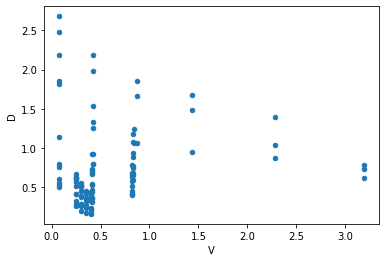

In [239]:
exp_data.plot.scatter('V','D')

In [240]:
def diameter_prediction(P,V,DTsub,DTsup,X):
    #prédit un diamètre à partir des arguments. Il faudra mettre les paramètres aussi. X est de dimension 5
    Tsat=steamTable.tsat_p(P)#Tsat en °C
    Tbulk=Tsat-DTsub
    rhof=steamTable.rho_pt(P,Tbulk)
    rhog=steamTable.rhoV_p(P)
    cpf=steamTable.Cp_pt(P,Tbulk)*1000
    hfg=(steamTable.hV_p(P)-steamTable.hL_p(P))*1000
    
    Jasub=rhof*cpf*DTsub/(rhog*hfg)
    Jasup=rhof*cpf*DTsup/(rhog*hfg)
    rhorel=(rhof-rhog)/rhog
    return X[0]*(rhorel**X[1])*(Jasup**X[2])*((1+Jasub)**X[3])*V**X[4]
    
    
    
def least_squares(par):
    #renvoie le carré de la somme des résidus par rapport aux données expérimentales.
    ssr=0
    for x in range(exp_data.shape[0]):
        ssr+=(diameter_prediction(exp_data['P'][x],exp_data['V'][x],exp_data['DTsub'][x],exp_data['DTsup'][x],par)-exp_data['D'][x]*1E-3)**2
    return ssr/exp_data.shape[0]

def compute_d(par2d):
    #renvoie une liste de prédictions de diamètres expérimentaux.
    #en paramètre : une liste de 3 paramètres qui sont t2,t3, p.
    params=[par2d[0],par2d[1],0.7,-0.2,-0.3]
    X=np.empty([exp_data.shape[0]])
    for i in range(exp_data.shape[0]):
        X[i]=diameter_prediction(exp_data['P'][i],exp_data['V'][i],exp_data['DTsub'][i],exp_data['DTsup'][i],params)
    return X

def create_predictions(df):
    #génère les prédictions de diamètres expérimentaux pour un dataframe donné.
    means=np.zeros([exp_data.shape[0]])
    var=np.zeros([exp_data.shape[0]])
    for index,row in df.iterrows():
        params=[row['t2'],row['t3']]
        Dpred=compute_d(params)
        for i in range(exp_data.shape[0]):
            means[i]+=Dpred[i]*row['p']
            var[i]+=(Dpred[i]**2)*row['p']
    var=var-np.array(means)**2
    d={'mean':means,'var':var}
    X=pd.DataFrame(d)
    return X
    

In [241]:
margopt32=pd.DataFrame(data=np.loadtxt("../../Calibration_Ravik/results/poptmarg32.gnu"),columns=['t3','t2','p'])
margkoh32=pd.DataFrame(data=np.loadtxt("../../Calibration_Ravik/results/pkohmarg32.gnu"),columns=['t3','t2','p'])
#print(margopt32['p'][margopt32['p']!=0])
#print(margopt32['p'][37])
margopt32['p']/=margopt32['p'].sum()
margkoh32['p']/=margkoh32['p'].sum()
#print(margopt32['p'].sum())
X0=[1E-6,0.3,0.7,-0.2,-0.3]
predFMP=create_predictions(margopt32)
predKOH=create_predictions(margkoh32)

In [242]:
print(predFMP)

         mean           var
0    0.000735  7.278517e-08
1    0.000696  6.524304e-08
2    0.000665  5.947933e-08
3    0.001037  1.448815e-07
4    0.001194  1.920812e-07
..        ...           ...
109  0.003168  1.177858e-06
110  0.003421  1.375189e-06
111  0.004515  2.393197e-06
112  0.004785  2.688104e-06
113  0.003165  1.173778e-06

[114 rows x 2 columns]


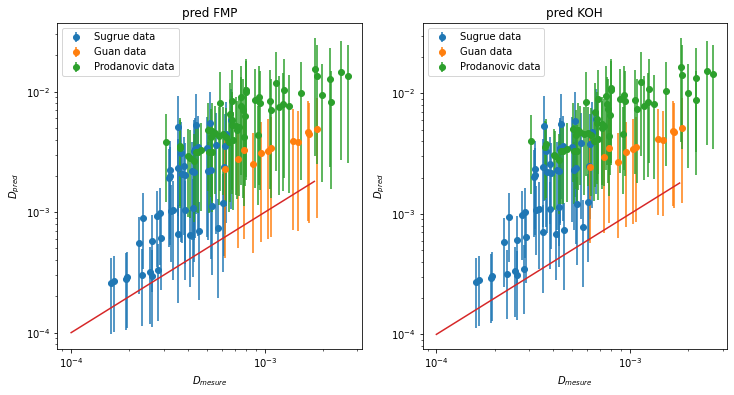

In [243]:
#fait le plot des fit avec la solution Ravik
concatenate_data=sugrue_data+guan_data+prodanovic_data
sugrue_df=pd.DataFrame(sugrue_data,columns=['P','V','DTsub','DTsup','D'])
guan_df=pd.DataFrame(guan_data,columns=['P','V','DTsub','DTsup','D'])
prodanovic_df=pd.DataFrame(prodanovic_data,columns=['P','V','DTsub','DTsup','D'])

sugrue_Dmes=np.zeros(sugrue_df.shape[0])
sugrue_DpredFMP=np.zeros(sugrue_df.shape[0])
sugrue_DpredKOH=np.zeros(sugrue_df.shape[0])

for x in range(sugrue_df.shape[0]):
    sugrue_Dmes[x]=sugrue_df['D'][x]*1E-3
    sugrue_DpredFMP[x]=predFMP['mean'][x]
    sugrue_DpredKOH[x]=predKOH['mean'][x]

guan_Dmes=np.zeros(guan_df.shape[0])
guan_DpredFMP=np.zeros(guan_df.shape[0])
guan_DpredKOH=np.zeros(guan_df.shape[0])

for x in range(guan_df.shape[0]):
    guan_Dmes[x]=guan_df['D'][x]*1E-3
    guan_DpredFMP[x]=predFMP['mean'][x+sugrue_df.shape[0]]
    guan_DpredKOH[x]=predKOH['mean'][x+sugrue_df.shape[0]]
    
prodanovic_Dmes=np.zeros(prodanovic_df.shape[0])
prodanovic_DpredFMP=np.zeros(prodanovic_df.shape[0])
prodanovic_DpredKOH=np.zeros(prodanovic_df.shape[0])

for x in range(prodanovic_df.shape[0]):
    prodanovic_Dmes[x]=prodanovic_df['D'][x]*1E-3
    prodanovic_DpredFMP[x]=predFMP['mean'][x+sugrue_df.shape[0]+guan_df.shape[0]]
    prodanovic_DpredKOH[x]=predKOH['mean'][x+sugrue_df.shape[0]+guan_df.shape[0]]
    
lims=[0.0001,0.0018]
plt.figure(figsize=(12,6))
plt.subplot(121)
#plt.xlim(lims)
#plt.ylim(lims)
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r'$D_{mesure}$')
plt.ylabel(r'$D_{pred}$')
plt.errorbar(sugrue_Dmes,sugrue_DpredFMP,yerr=2*np.sqrt(predFMP['var'][:sugrue_df.shape[0]]),label='Sugrue data',fmt='o')
plt.errorbar(guan_Dmes,guan_DpredFMP,yerr=2*np.sqrt(predFMP['var'][sugrue_df.shape[0]:sugrue_df.shape[0]+guan_df.shape[0]]),label='Guan data',fmt='o')
plt.errorbar(prodanovic_Dmes,prodanovic_DpredFMP,yerr=2*np.sqrt(predFMP['var'][sugrue_df.shape[0]+guan_df.shape[0]:]),label='Prodanovic data',fmt='o')
plt.title('pred FMP')
plt.plot(lims,lims)
plt.legend()
plt.subplot(122)
#plt.xlim(lims)
#plt.ylim(lims)
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r'$D_{mesure}$')
plt.ylabel(r'$D_{pred}$')
plt.errorbar(sugrue_Dmes,sugrue_DpredKOH,yerr=2*np.sqrt(predKOH['var'][:sugrue_df.shape[0]]),label='Sugrue data',fmt='o')
plt.errorbar(guan_Dmes,guan_DpredKOH,yerr=2*np.sqrt(predKOH['var'][sugrue_df.shape[0]:sugrue_df.shape[0]+guan_df.shape[0]]),label='Guan data',fmt='o')
plt.errorbar(prodanovic_Dmes,prodanovic_DpredKOH,yerr=2*np.sqrt(predKOH['var'][sugrue_df.shape[0]+guan_df.shape[0]:]),label='Prodanovic data',fmt='o')
plt.title('pred KOH')
plt.plot(lims,lims)
plt.legend()



plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


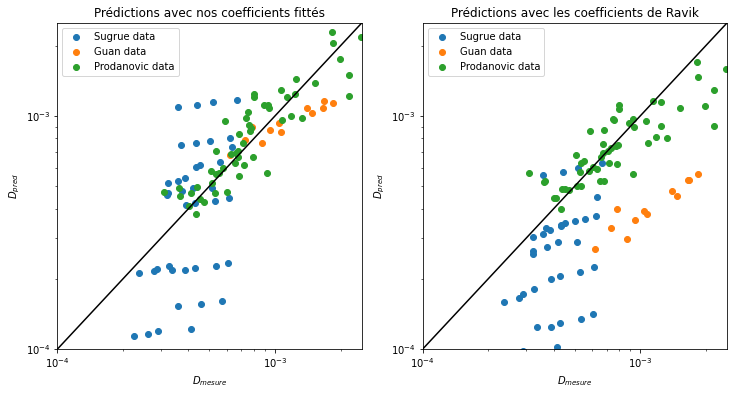

In [244]:
#fait le plot des fit, pour voir si la corrélation marche bien.
concatenate_data=sugrue_data+guan_data+prodanovic_data
sugrue_df=pd.DataFrame(sugrue_data,columns=['P','V','DTsub','DTsup','D'])
guan_df=pd.DataFrame(guan_data,columns=['P','V','DTsub','DTsup','D'])
prodanovic_df=pd.DataFrame(prodanovic_data,columns=['P','V','DTsub','DTsup','D'])
Ravikcoefs=[18.9E-6,0.27,0.75,-0.3,-0.26]


sugrue_Dmes=np.zeros(sugrue_df.shape[0])
sugrue_Dpred=np.zeros(sugrue_df.shape[0])
sugrue_DpredRavik=np.zeros(sugrue_df.shape[0])

for x in range(sugrue_df.shape[0]):
    sugrue_Dmes[x]=sugrue_df['D'][x]*1E-3
    sugrue_Dpred[x]=diameter_prediction(sugrue_df['P'][x],sugrue_df['V'][x],sugrue_df['DTsub'][x],sugrue_df['DTsup'][x],optresult)
    sugrue_DpredRavik[x]=diameter_prediction(sugrue_df['P'][x],sugrue_df['V'][x],sugrue_df['DTsub'][x],sugrue_df['DTsup'][x],Ravikcoefs)

guan_Dmes=np.zeros(guan_df.shape[0])
guan_Dpred=np.zeros(guan_df.shape[0])
guan_DpredRavik=np.zeros(guan_df.shape[0])

for x in range(guan_df.shape[0]):
    guan_Dmes[x]=guan_df['D'][x]*1E-3
    guan_Dpred[x]=diameter_prediction(guan_df['P'][x],guan_df['V'][x],guan_df['DTsub'][x],guan_df['DTsup'][x],optresult)
    guan_DpredRavik[x]=diameter_prediction(guan_df['P'][x],guan_df['V'][x],guan_df['DTsub'][x],guan_df['DTsup'][x],Ravikcoefs)

prodanovic_Dmes=np.zeros(prodanovic_df.shape[0])
prodanovic_Dpred=np.zeros(prodanovic_df.shape[0])
prodanovic_DpredRavik=np.zeros(prodanovic_df.shape[0])

for x in range(prodanovic_df.shape[0]):
    prodanovic_Dmes[x]=prodanovic_df['D'][x]*1E-3
    prodanovic_Dpred[x]=diameter_prediction(prodanovic_df['P'][x],prodanovic_df['V'][x],prodanovic_df['DTsub'][x],prodanovic_df['DTsup'][x],optresult)
    prodanovic_DpredRavik[x]=diameter_prediction(prodanovic_df['P'][x],prodanovic_df['V'][x],prodanovic_df['DTsub'][x],prodanovic_df['DTsup'][x],Ravikcoefs)


    
lims=[0.0001,0.0025]
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.xlim(lims)
plt.ylim(lims)
plt.xscale("log")
plt.yscale("log")
plt.scatter(sugrue_Dmes,sugrue_Dpred,label='Sugrue data')
plt.scatter(guan_Dmes,guan_Dpred,label='Guan data')
plt.scatter(prodanovic_Dmes,prodanovic_Dpred,label='Prodanovic data')
plt.xlabel(r'$D_{mesure}$')
plt.ylabel(r'$D_{pred}$')
plt.title('Prédictions avec nos coefficients fittés')
plt.legend()
plt.plot(lims,lims,color='black')

plt.subplot(122)
plt.xlim(lims)
plt.ylim(lims)
plt.xscale("log")
plt.yscale("log")
plt.scatter(sugrue_Dmes,sugrue_DpredRavik,label='Sugrue data')
plt.scatter(guan_Dmes,guan_DpredRavik,label='Guan data')
plt.scatter(prodanovic_Dmes,prodanovic_DpredRavik,label='Prodanovic data')
plt.xlabel(r'$D_{mesure}$')
plt.ylabel(r'$D_{pred}$')
plt.title('Prédictions avec les coefficients de Ravik')
plt.legend()
plt.plot(lims,lims,color='black')

plt.savefig("correlation.eps")


plt.show()


In [245]:
res=opt.minimize(least_squares,X0,method='Nelder-Mead',options={"maxiter":5000})
optresult=res.x
print(optresult)

[ 1.02694640e-06  9.68613115e-01  5.44542915e-01 -5.58579638e-01
 -1.58545623e-01]
